In [44]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [45]:
# Read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

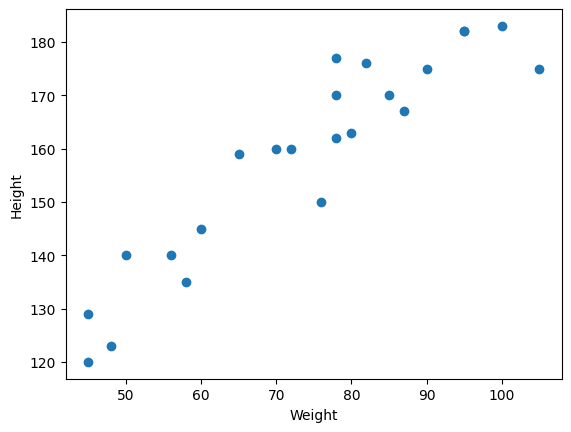

In [46]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel('Height')

In [47]:
# Divide our dataset into dependent and independent feature
x=df[['Weight']]
y=df['Height']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [50]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [51]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)#fit calculates the mean and standard deviation which is used by transform in when transform applies z_score formula
x_test=scaler.transform(x_test)#fit is not required as mean and standard deviation will be same as of x_train so only z_score formula is need to be applied

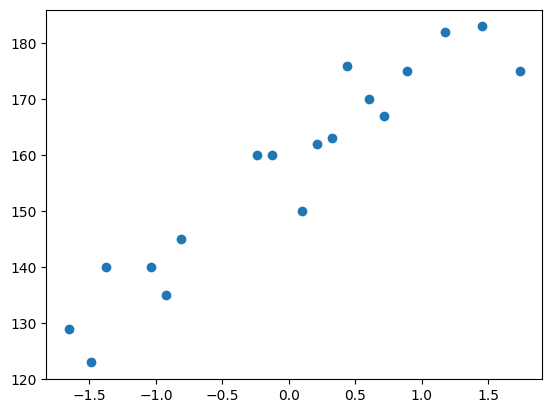

In [52]:
plt.scatter(x_train,y_train)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
regressor=LinearRegression()

In [55]:
regressor

LinearRegression()

In [56]:
type(x_train)

numpy.ndarray

In [57]:
# ✅ 2. Why reshape with reshape(-1, 1)?
# When using scikit-learn, especially with StandardScaler, many models expect input in the shape:
# (n_samples,n_features)
x_train=np.array(x_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)

In [58]:
y_train.shape

(18,)

In [59]:
regressor.fit(x_train,y_train)

LinearRegression()

In [60]:

## coefficient and intercepts
print("Coefficient : ",regressor.coef_)
print("Intercept : ",regressor.intercept_)

Coefficient :  [17.03440872]
Intercept :  157.5


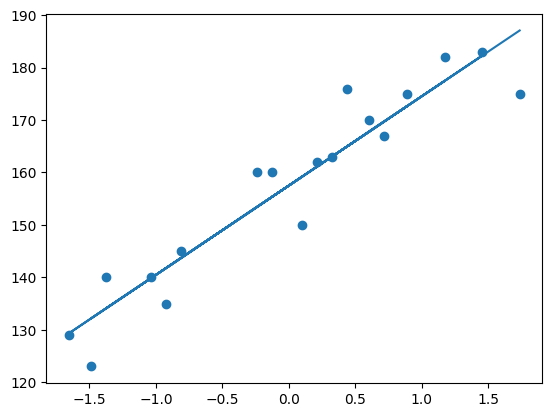

In [61]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train))


prediction of train data
1.predicted height output= intercept +coef_(Weights)
2.y_pred_train =157.5 + 17.03(X_train)
prediction of test data
1.predicted height output= intercept +coef_(Weights)
2.y_pred_test =157.5 + 17.03(X_test)

In [62]:
y_pred_test=regressor.predict(x_test)

In [63]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

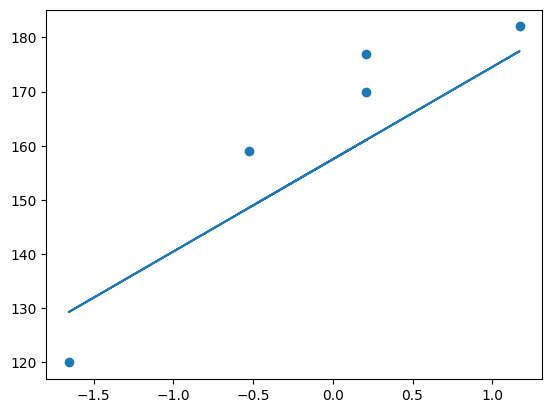

In [64]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test))

In [65]:

### Performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [66]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [67]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [68]:
print(score)

0.776986986042344


R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [69]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7026493147231252

In [70]:
regressor.predict(scaler.transform([[75]]))

c:\Users\BIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.19553315])

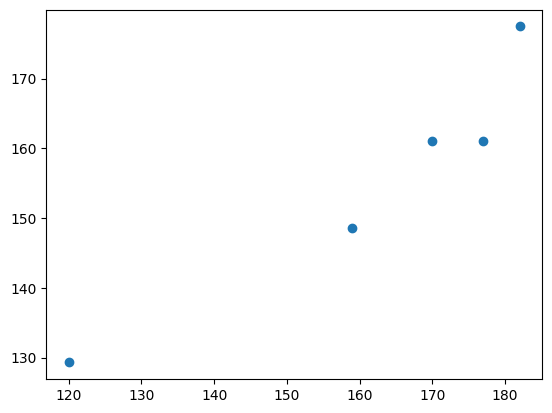

In [71]:
## Assumptions

## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [72]:

## Residuals
residuals=y_test-y_pred_test

residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

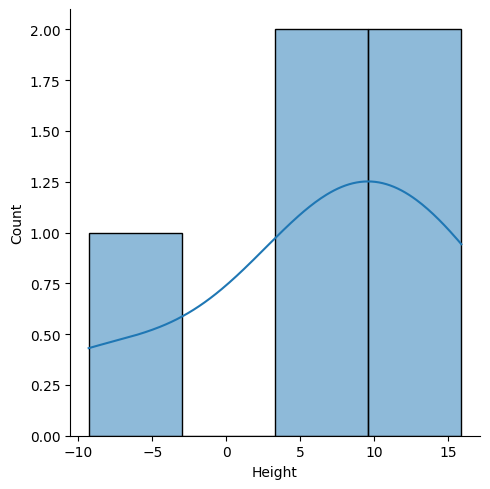

In [75]:
## Plot this residuals 
import seaborn as sns
sns.displot(residuals,kde=True)

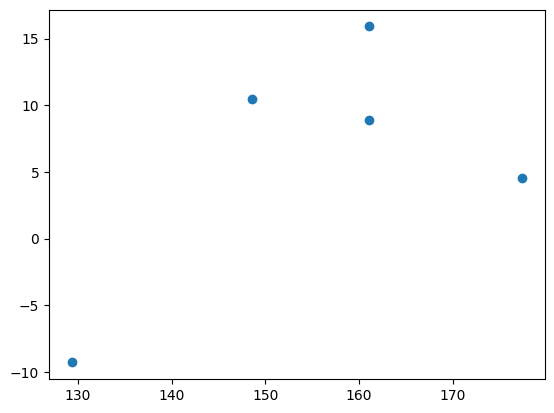

In [74]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)